In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
from ctf.ctf.functions2d import branin
Br = branin.Branin()
X1_domain = Br.domain[0]
X2_domain = Br.domain[1]

In [3]:
X1 = np.linspace(X1_domain[0], X1_domain[1],10)
X2 = np.linspace(X2_domain[0], X2_domain[1],10)

Xtt1, Xtt2 = np.meshgrid(X1, X2)
X_train = np.zeros(shape =(np.ravel(Xtt1).shape[0],2))
X_train[:,0] = np.ravel(Xtt1) 
X_train[:,1] = np.ravel(Xtt2)

In [4]:
Xtrain_mean = np.mean(X_train, 0)
Xtrain_std = np.std(X_train, 0)
X_train_norm = (X_train - Xtrain_mean)/Xtrain_std
Y_train = Br.cost(X_train.T)

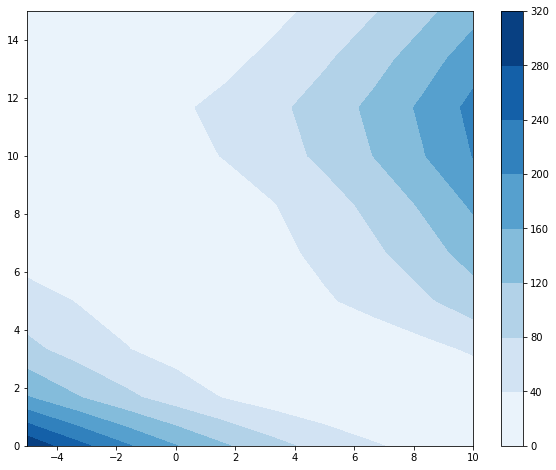

In [5]:
plt.figure(figsize=(10,8))
num_grid = X1.shape[0]
c = plt.contourf(X1, X2, Y_train.reshape((num_grid, num_grid), order='F'), cmap=plt.cm.Blues)
plt.colorbar(c)

In [6]:
#build the model
k1 = gpflow.kernels.RBF(1)
k2 = gpflow.kernels.RBF(1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale2D(X_train_norm, Y_train[:,None], k1, k2, nonstat)

In [7]:
# Lengthscale 1 GP priors 
#m.kern1.variance = 0.1
#m.kern1.variance.fixed = True
#m.kern1.lengthscales = 0.5
#m.kern1.lengthscales.fixed = True
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
# Lengthscale 2 GP priors
#m.kern2.variance = 0.1
#m.kern2.variance.fixed = True
#m.kern2.lengthscales = 0.5
#m.kern2.lengthscales.fixed = True
m.kern2.variance.prior = gpflow.priors.Gamma(1., 1.)
m.kern2.lengthscales.prior = gpflow.priors.Gamma(1., 1.)

# Non stationary signal variance prior
#m.nonstat.signal_variance = 100
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

m.likelihood.variance = 0.01
m.likelihood.variance.fixed = True

In [8]:
import tensorflow as tf
m.optimize(maxiter=10000)

      fun: array([ 385.65506852])
 hess_inv: <305x305 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.63769221e+00,  -7.19942927e+01,  -8.29139911e+00,
        -4.42761015e+01,   2.26085313e+00,   6.11980619e+02,
        -3.09261446e+02,  -7.65178218e+01,   1.11199609e+01,
         1.94380046e+02,   1.86341804e-01,   3.26611991e-01,
         5.05158695e-02,   7.76731061e-01,  -4.66234574e-01,
         3.08734860e-01,  -1.02779716e-01,  -8.61978448e-01,
         1.01379894e+00,   2.35358207e+00,  -4.37477170e-01,
        -1.08068511e+00,  -1.99739396e-02,  -2.98321379e+00,
         3.15972423e+00,  -9.90453239e-01,   4.95899903e-03,
         2.92884001e+00,  -1.02549261e+00,  -6.20986969e+00,
         5.07883627e-01,   1.66015341e+00,   1.04751188e-02,
         3.94248417e+00,  -4.17067537e+00,  -3.45769586e-01,
        -1.00658205e+00,  -3.64849598e+00,   7.16880108e-01,
         6.17280130e+00,  -2.33928861e-01,  -1.29103669e+00,
        -9.54749634e-02,  -1.90473265e+00

In [9]:
#samples = m.sample(200, verbose=True, epsilon=0.005, thin = 2, burn = 100, Lmax = 160)

In [10]:
mean, var = m.predict_f(X_train_norm)

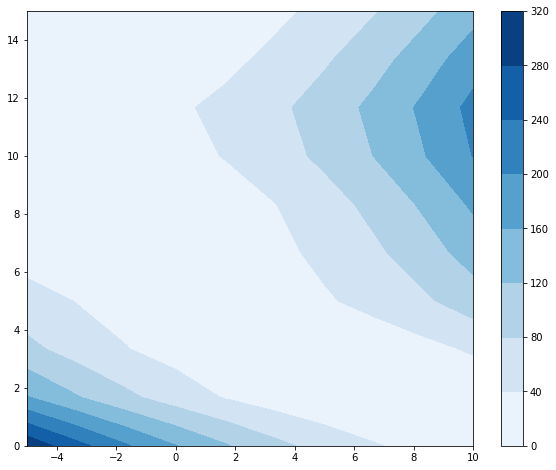

In [11]:
plt.figure(figsize=(10,8))
num_grid = X1.shape[0]
c = plt.contourf(X1, X2, mean.reshape((num_grid, num_grid), order='F'), cmap=plt.cm.Blues)
plt.colorbar(c)

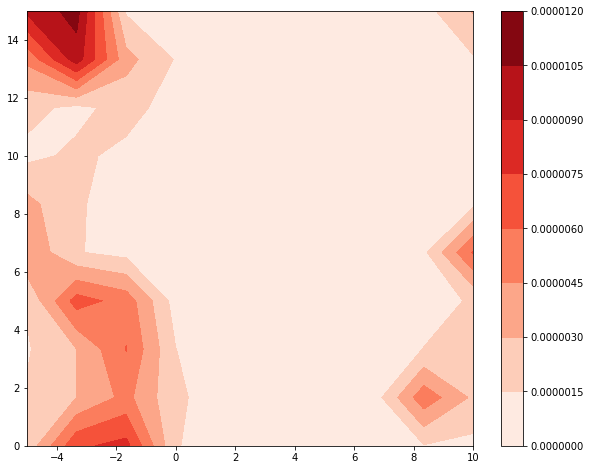

In [12]:
plt.figure(figsize=(10,8))
num_grid = X1.shape[0]
c = plt.contourf(X1, X2, np.diag(var).reshape((num_grid, num_grid), order='F'), cmap=plt.cm.Reds)
plt.colorbar(c)

In [14]:
samples = m.sample(200, verbose=True, epsilon=0.005, thin = 2, burn = 100, Lmax = 160)

burn-in sampling started


InvalidArgumentError: Input matrix is not invertible.
	 [[Node: gradients/adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2, gradients/adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2_grad/eye/MatrixDiag)]]

Caused by op u'gradients/adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2_grad/MatrixTriangularSolve', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2828, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-5205dbfbcd7c>", line 2, in <module>
    m.optimize(maxiter=10000)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 250, in optimize
    return self._optimize_np(method, tol, callback, maxiter, **kw)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 311, in _optimize_np
    self.compile()
  File "../GPHetero/hetero_gpmc.py", line 790, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 157, in compile
    g = tf.gradients(f, self._free_vars)[0]
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 488, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 379, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/linalg_grad.py", line 70, in _CholeskyGrad
    dtype=l.dtype))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 1398, in matrix_triangular_solve
    adjoint=adjoint, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op u'adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
[elided 22 identical lines from previous traceback]
  File "../GPHetero/hetero_gpmc.py", line 790, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 156, in compile
    f = self.build_likelihood() + self.build_prior()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/scoping.py", line 43, in runnable
    return f(*args, **kwargs)
  File "../GPHetero/hetero_gpmc.py", line 814, in build_likelihood
    Lnonstat = tf.cholesky(Knonstat + tf.eye(tf.shape(self.X)[0], dtype=float_type)*settings.numerics.jitter_level)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 704, in cholesky
    "Cholesky", input=input, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input matrix is not invertible.
	 [[Node: gradients/adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2, gradients/adaptive_lengthscale_gp2D.build_likelihood/Cholesky_2_grad/eye/MatrixDiag)]]
